In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

## Pregnancy, abortion, birth, miscarriage, contraceptive data from Guttmacher

In [29]:
data_path = './Data/'
pregnancy = pd.read_csv(data_path+'pregnancy.csv')
pregnancy = pregnancy[pregnancy['state'] == 'MO']

In [30]:
# data cleaning
def get_metric(df, s):
    columns = pregnancy.columns.tolist()
    df_selected = df[['year'] + [i for i in columns if s in i]]
    return df_selected
# pregnancy_rate = get_metric(pregnancy, 'pregnancyrate') # Rate is defined as number of pregnancies per 1,000 women
# # abortion_rate = get_metric(pregnancy, 'abortionrate') # Rate is defined as number of abortions per 1,000 women
# birth_rate = get_metric(pregnancy, 'birthrate') # Rate is defined as number of births per 1,000 women
# # pregnancies = get_metric(pregnancy, 'pregnancies') # (rounded to nearest 10)
# abortion_ratio = get_metric(pregnancy, 'abortionratio') # Number of abortions per 1,000 births
pregnancies = get_metric(pregnancy, 'pregnancies')
abortions = get_metric(pregnancy, 'abortions')
births = get_metric(pregnancy, 'births')
miscarriages = get_metric(pregnancy, 'miscarriages') # Number of miscarriages to individuals
population = get_metric(pregnancy, 'population')

# miscarriages_ratio = miscarriages.copy()
# miscarriages_ratio.iloc[:,1:] = round(miscarriages.div(births.values)*1000, 0).iloc[:,1:] # Number of miscarriages per 1,000 births

In [31]:
def clean_column_names(df, col, columns):
    mapping = {'lt15': 'less than 15', '1517':'15-17', 
               '1819':'18-19', '1519':'15-19', 'lt20':'less than 20'}
    df.columns = df.columns.str.replace(col,'')
    df = df.rename(columns=mapping)
    df = pd.melt(df[columns], id_vars=columns[0], value_vars=columns[1:], var_name='group', value_name='count')
    df['metrics'] = col
    return df

columns = ['year', 'less than 15', '15-17', '18-19', '15-19', 'less than 20', 'total']
pregnancies = clean_column_names(pregnancies, 'pregnancies', columns)
abortions = clean_column_names(abortions, 'abortions', columns)
births = clean_column_names(births, 'births', columns)
miscarriages = clean_column_names(miscarriages, 'miscarriages', columns)
columns = ['year', 'less than 15', '15-17', '18-19', '15-19', 'less than 20']
population = clean_column_names(population, 'population', columns)

guttmacher = pd.concat([pregnancies, abortions, births, miscarriages, population]).reset_index(drop=True)
guttmacher.to_csv(data_path+'clean_data/guttmacher_pregnacy_abortion_birth_miscarriage_by_age_by_year.csv', index=False)

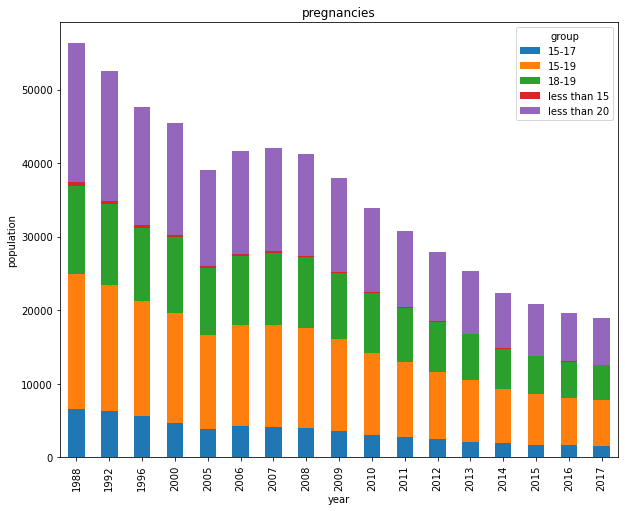

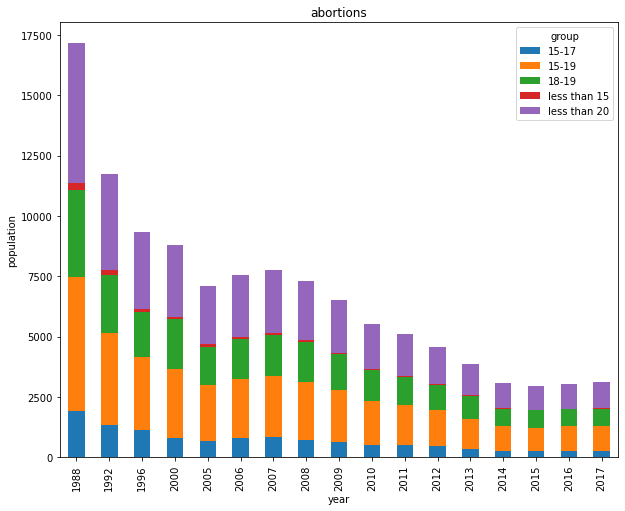

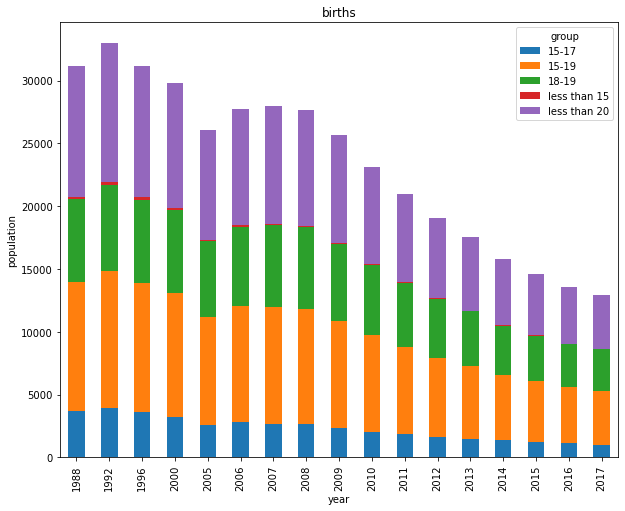

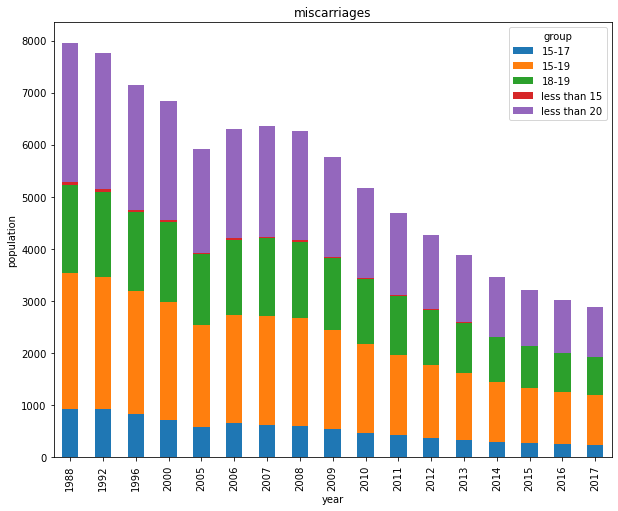

In [46]:
for metrics in guttmacher.metrics.unique():
    if metrics != 'population':
        fig, ax = plt.subplots(figsize=(10,8))
        df = guttmacher[guttmacher.metrics == metrics].iloc[:,:-1].pivot(index='year',columns='group',values='count').reset_index()
        df.drop('total',axis=1).plot(x='year',kind='bar',stacked=True, ax=ax)
        ax.set_ylabel('population');
        ax.set_title(metrics);

In [48]:
need_contraceptive_by_age = pd.read_excel(data_path+'need_contraceptive_by_age.xlsx')
need_contraceptive_by_age = need_contraceptive_by_age.iloc[1:-3, :]
need_contraceptive_by_age.columns = need_contraceptive_by_age.columns.str.replace(r'No. of women with potential demand for contraceptive services and supplies, |, 2016', '', regex=True)
need_contraceptive_by_age.iloc[:,1:] = need_contraceptive_by_age.iloc[:,1:].apply(lambda x: pd.to_numeric(x.str.replace(',',''), errors='coerce'), axis=1)
need_contraceptive_by_age = need_contraceptive_by_age.rename(columns={'U.S. County':'County'})[['County','aged 18-19','younger than 18','younger than 20','Population of women aged 13-44']]
need_contraceptive_by_age.to_csv(data_path+'clean_data/guttmacher_need_contraceptive_by_age_2016.csv', index=False)

In [120]:
need_contraceptive_by_age

,County,aged 18-19,younger than 18,younger than 20,Population of women aged 13-44
1,Adair,410,290,710,6900
2,Andrew,140,120,260,3240
3,Atchison,40,30,70,880
4,Audrain,190,150,330,6040
5,Barry,290,210,500,6200
...,...,...,...,...,...
111,Washington,190,150,340,4520
112,Wayne,90,70,170,2120
113,Webster,330,260,590,7170
114,Worth,20,10,30,320


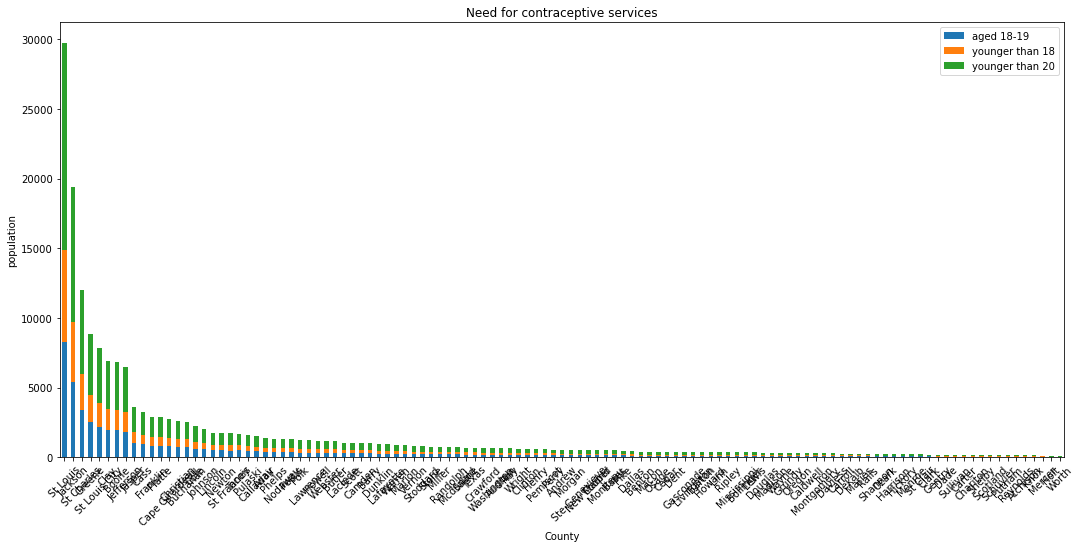

In [116]:
fig, ax = plt.subplots(figsize=(18,8))
df = need_contraceptive_by_age.iloc[:,:-1]
order = df.iloc[:,1:].sum(axis=1).sort_values(ascending=False).index.to_list()
df.loc[order,:].plot(x='County',kind='bar',stacked=True, ax=ax);
ax.set_ylabel('population');
ax.set_title('Need for contraceptive services');
ax.tick_params(axis='x', rotation=45);

## STD by County

In [73]:
std = pd.read_excel(data_path+'STD2019.xlsx').iloc[:-1,[0,1,-1]].rename(columns={'Grand Total':'count'})
std['County'] = std.County.ffill()
std.to_csv(data_path+'clean_data/std_by_county_2019.csv', index=False)

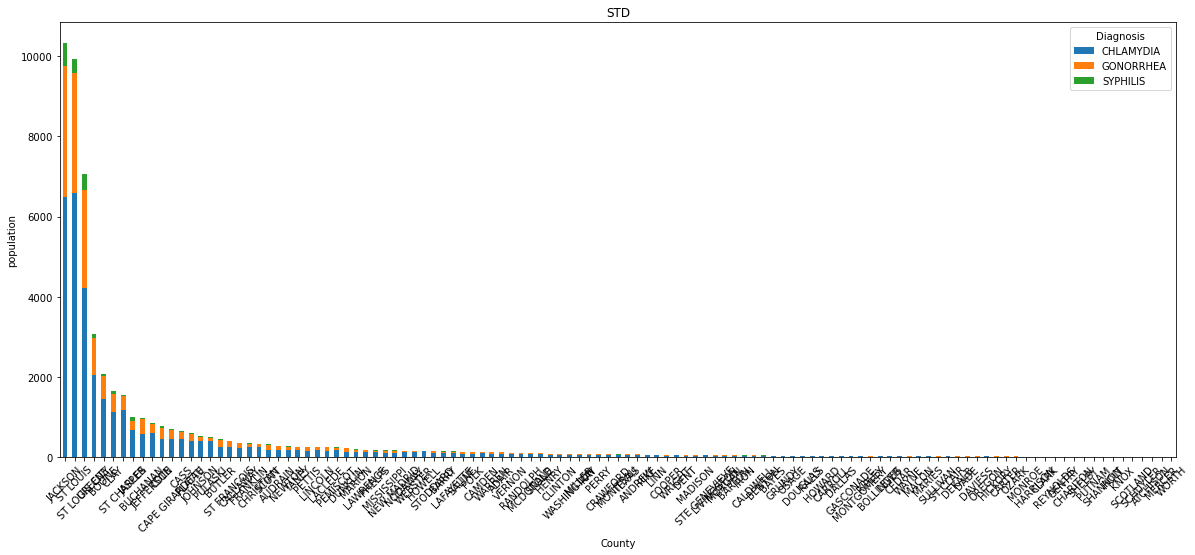

In [117]:
fig, ax = plt.subplots(figsize=(20,8))
df = std.pivot(index='County',columns='Diagnosis',values='count').reset_index()
order = df.iloc[:,1:].sum(axis=1).sort_values(ascending=False).index.to_list()
df.loc[order,:].plot(x='County',kind='bar',stacked=True, ax=ax)
ax.set_ylabel('population');
ax.set_title('STD');
ax.tick_params(axis='x', rotation=45);

## Pregnancies and Abortions by Selected Ages by County

In [6]:
pregnacy_abortion = pd.read_excel(data_path+'Pregnancies and Abortions by Selected Ages by County.xlsx')
pregnacy_abortion.to_csv(data_path+'clean_data/pregnacy_and_abortion_by_county_by_age_2019.csv', index=False)

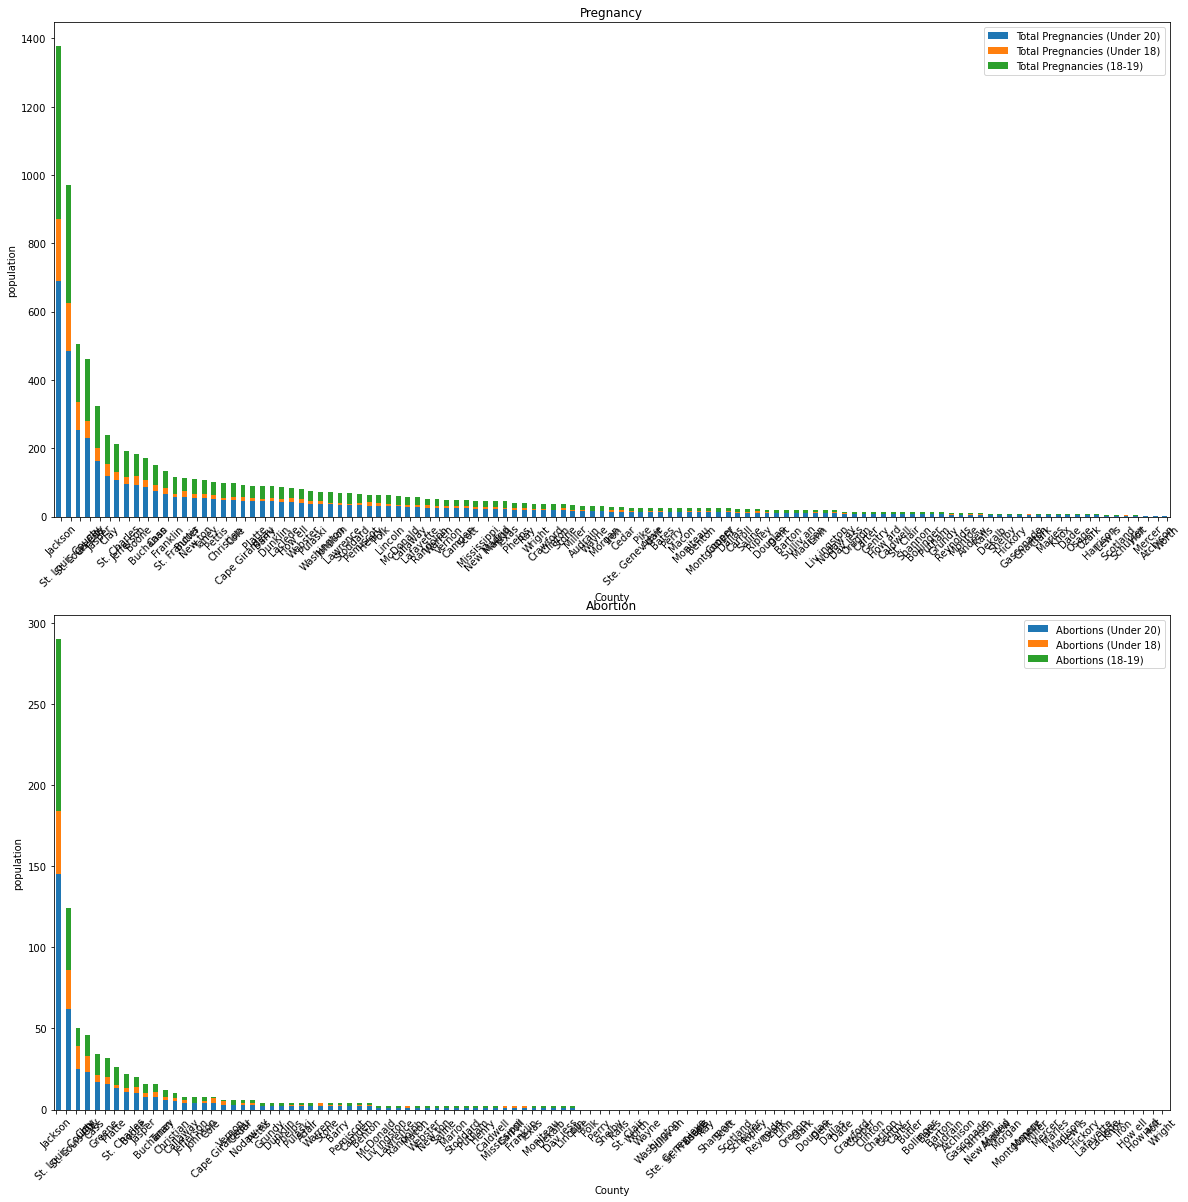

In [118]:
pregnacy_abortion

fig, ax = plt.subplots(2,1, figsize=(20,20))
df = pregnacy_abortion.iloc[:,:4]
order = df.iloc[:,1:].sum(axis=1).sort_values(ascending=False).index.to_list()
df.loc[order,:].plot(x='County',position=1,kind='bar',stacked=True, ax=ax[0])

df = pregnacy_abortion.iloc[:,[0,4,5,6]]
order = df.iloc[:,1:].sum(axis=1).sort_values(ascending=False).index.to_list()
df.loc[order,:].plot(x='County',position=0,kind='bar',stacked=True, ax=ax[1])

ax[0].set_ylabel('population');
ax[0].set_title('Pregnancy'); 
ax[0].tick_params(axis='x', rotation=45);

ax[1].set_ylabel('population');
ax[1].set_title('Abortion'); 
ax[1].tick_params(axis='x', rotation=45);

## Domestic violence

In [96]:
domestic_violence = pd.read_excel(data_path+'2018 Domestic Violence Incidents.xlsx', header=3)
domestic_violence.columns = domestic_violence.columns.str.replace('^\s*\\n|\s+$','', regex=True).str.replace('[\s*\\n]+',' ', regex=True)
domestic_violence.iloc[:-1,:].to_csv(data_path+'clean_data/domestic_violence_by_county_2018.csv', index=False)

D:\Ananconda\install\envs\py3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


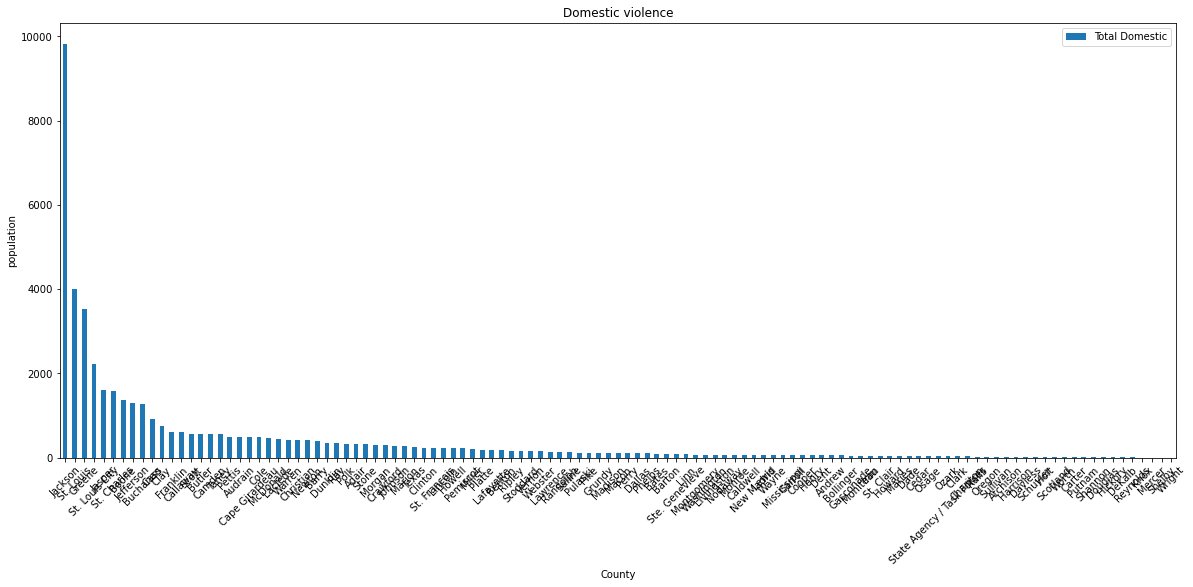

In [119]:
fig, ax = plt.subplots(figsize=(20,8))
df = domestic_violence.iloc[:-1][['County','Total Domestic']]
order = df.iloc[:,1:].sum(axis=1).sort_values(ascending=False).index.to_list()
df.loc[order,:].plot(x='County', kind='bar', ax=ax);
ax.set_ylabel('population');
ax.set_title('Domestic violence');
ax.tick_params(axis='x', rotation=45);